In [29]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to extract data from a single page
def scrape_page_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    movies = soup.find_all('div', class_='lister-item-content')

    data_csv1 = []
    data_csv2 = []

    for movie in movies:
        movie_name = movie.h3.a.text
        directors = movie.find_all('p')[2].find_all('a')
        directors_list = [director.text for director in directors]
        duration = movie.find('span', class_='runtime').text
        year = movie.find('span', class_='lister-item-year').text.strip('()')
        rating = movie.strong.text
        metascore = movie.find('span', class_='metascore').text.strip() if movie.find('span', class_='metascore') else ''
        stars = movie.find('p', class_='').find_all('a')
        stars_list = [star.text for star in stars]
        votes = movie.find('span', attrs={'name': 'nv'}).text
        genre = movie.find('span', class_='genre').text.strip()
        gross = movie.find_all('span', attrs={'name': 'nv'})[-1].text if len(movie.find_all('span', attrs={'name': 'nv'})) > 1 else ''
        popularity = movie.find('span', class_='lister-item-index unbold text-primary').text
        certification = movie.find('span', class_='certificate').text if movie.find('span', class_='certificate') else ''

        data_csv1.append([movie_name, directors_list, duration, year, rating, metascore])
        data_csv2.append([movie_name, stars_list, votes, genre, gross, popularity, certification])

    return data_csv1, data_csv2

# Function to store data in CSV files
def create_csv(data, columns, filename):
    df = pd.DataFrame(data, columns=columns)
    df.to_csv(filename, index=False)

# IMDb URL for pagination
base_url = "https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1&page="

# Scrape data from all pages
data_csv1_all = []
data_csv2_all = []

current_page = 1
while current_page<=36 :
    url = base_url + str(current_page)
    print(f"Scraping data from page {current_page}...")
    data_csv1, data_csv2 = scrape_page_data(url)

    if not data_csv1 or not data_csv2:
        break

    data_csv1_all.extend(data_csv1)
    data_csv2_all.extend(data_csv2)

    current_page += 1

# CSV 1 columns
csv1_columns = ['Movie Name', 'Director1', 'Director2', 'Duration', 'Year', 'Ratings', 'Metascore']

# CSV 2 columns
csv2_columns = ['Movie Name', 'Star1', 'Star2', 'Star3', 'Star4', 'Votes', 'Genre1', 'Genre2', 'Genre3', 'Gross collection', 'Popularity', 'Certification']

# Splitting data for CSV 1
csv1_data = []
for item in data_csv1_all:
    movie_name, directors, duration, year, rating, metascore = item
    director1 = directors[0] if len(directors) > 0 else ''
    director2 = directors[1] if len(directors) > 1 else ''
    csv1_data.append([movie_name, director1, director2, duration, year, rating, metascore])

# Splitting data for CSV 2
csv2_data = []
for item in data_csv2_all:
    movie_name, stars, votes, genre, gross, popularity, certification = item
    star1 = stars[0] if len(stars) > 0 else ''
    star2 = stars[1] if len(stars) > 1 else ''
    star3 = stars[2] if len(stars) > 2 else ''
    star4 = stars[3] if len(stars) > 3 else ''
    genres = genre.split(',')
    genre1 = genres[0].strip() if len(genres) > 0 else ''
    genre2 = genres[1].strip() if len(genres) > 1 else ''
    genre3 = genres[2].strip() if len(genres) > 2 else ''
    csv2_data.append([movie_name, star1, star2, star3, star4, votes, genre1, genre2, genre3, gross, popularity, certification])

# Creating CSV files
create_csv(csv1_data, csv1_columns, 'imdb_data_csv1_all.csv')
create_csv(csv2_data, csv2_columns, 'imdb_data_csv2_all.csv')

print("Data has been scraped from all pages and saved to CSV files successfully.")

Scraping data from page 1...
Scraping data from page 2...
Scraping data from page 3...
Scraping data from page 4...
Scraping data from page 5...
Scraping data from page 6...
Scraping data from page 7...
Scraping data from page 8...
Scraping data from page 9...
Scraping data from page 10...
Scraping data from page 11...
Scraping data from page 12...
Scraping data from page 13...
Scraping data from page 14...
Scraping data from page 15...
Scraping data from page 16...
Scraping data from page 17...
Scraping data from page 18...
Scraping data from page 19...
Scraping data from page 20...
Scraping data from page 21...
Scraping data from page 22...
Scraping data from page 23...
Scraping data from page 24...
Scraping data from page 25...
Scraping data from page 26...
Scraping data from page 27...
Scraping data from page 28...
Scraping data from page 29...
Scraping data from page 30...
Scraping data from page 31...
Scraping data from page 32...
Scraping data from page 33...
Scraping data from 

The above is coded to scrape the IMDB content of the top movies from the IMDB website.

In [31]:
import sqlite3
import pandas as pd

# Function to create the SQLite database, tables, and insert data
def create_database_and_tables():
    conn = sqlite3.connect('imdb_data.db')
    cursor = conn.cursor()

    # Create Table 1
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Table1 (
        Sno INTEGER PRIMARY KEY,
        MovieName TEXT,
        DirectorName TEXT,
        Duration TEXT,
        Genre TEXT,
        Ratings REAL
    )
    ''')

    # Create Table 2
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Table2 (
        MovieName TEXT PRIMARY KEY,
        Stars TEXT,
        Votes INTEGER,
        Genre TEXT,
        GrossCollection TEXT,
        Popularity TEXT,
        Certification TEXT
    )
    ''')

    # Load CSV data into data frames
    df1 = pd.read_csv('imdb_data_csv1_all.csv')
    df2 = pd.read_csv('imdb_data_csv2_all.csv')

    # Insert data into Table 1
    df1.to_sql('Table1', conn, if_exists='replace', index=False)

    # Insert data into Table 2
    df2.to_sql('Table2', conn, if_exists='replace', index=False)
    
    print(df1)
    print(df2)
    # Commit and close the connection
    conn.commit()
    conn.close()
    df2['Director1'] = df1['Director1']
    df2['Director2'] = df1['Director2']
    df2['Duration'] = df1['Duration']
    df2['Year'] = df1['Year']
    df2['Ratings'] = df1['Ratings']
    df2['Metascore'] = df1['Metascore']
    merged_df = df2
    return merged_df
    
# Create the database, tables, and insert data
df = create_database_and_tables()

                                             Movie Name           Director1  \
0                                       The Dark Knight   Christopher Nolan   
1         The Lord of the Rings: The Return of the King       Peter Jackson   
2                   Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
3                                             Inception   Christopher Nolan   
4     The Lord of the Rings: The Fellowship of the Ring       Peter Jackson   
...                                                 ...                 ...   
1795                 Kimetsu no Yaiba: Mugen Ressha-Hen      Haruo Sotozaki   
1796                                 Gangs of Wasseypur      Anurag Kashyap   
1797                                            Yôjinbô      Akira Kurosawa   
1798                                   K.G.F: Chapter 1      Prashanth Neel   
1799                        Baahubali 2: The Conclusion      S.S. Rajamouli   

              Director2 Duration  Year  Ratings  Me

Two different tables have been created with various column but with only one common column "Movie Name". Once created, both the table are merged into one for Exploratory Data Analysis.

In [57]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error,mean_absolute_error
import pickle
import os
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import joblib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [33]:
df

,Movie Name,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross collection,Popularity,Certification,Director1,Director2,Duration,Year,Ratings,Metascore
0,The Dark Knight,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,"2,759,436",Action,Crime,Drama,$534.86M,1.0,UA,Christopher Nolan,Christian Bale,152 min,2008,9.0,84.0
1,The Lord of the Rings: The Return of the King,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,"1,906,461",Action,Adventure,Drama,$377.85M,2.0,U,Peter Jackson,Elijah Wood,201 min,2003,9.0,94.0
2,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,"208,788",Animation,Action,Adventure,NaN,3.0,U,Joaquim Dos Santos,Kemp Powers,140 min,2023,8.8,86.0
3,Inception,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,"2,449,750",Action,Adventure,Sci-Fi,$292.58M,4.0,UA,Christopher Nolan,Leonardo DiCaprio,148 min,2010,8.8,74.0
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,"1,934,666",Action,Adventure,Drama,$315.54M,5.0,U,Peter Jackson,Elijah Wood,178 min,2001,8.8,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Kimetsu no Yaiba: Mugen Ressha-Hen,Haruo Sotozaki,Natsuki Hanae,Akari Kitô,Yoshitsugu Matsuoka,"66,792",Animation,Action,Adventure,$47.70M,46.0,UA,Haruo Sotozaki,Natsuki Hanae,117 min,2020,8.2,72.0
1796,Gangs of Wasseypur,Anurag Kashyap,Manoj Bajpayee,Nawazuddin Siddiqui,Tigmanshu Dhulia,"100,150",Action,Comedy,Crime,NaN,47.0,A,Anurag Kashyap,Manoj Bajpayee,321 min,2012,8.2,89.0
1797,Yôjinbô,Akira Kurosawa,Toshirô Mifune,Eijirô Tôno,Tatsuya Nakadai,"127,201",Action,Drama,Thriller,NaN,48.0,U,Akira Kurosawa,Toshirô Mifune,110 min,1961,8.2,93.0
1798,K.G.F: Chapter 1,Prashanth Neel,Yash,Srinidhi Shetty,Ramachandra Raju,"92,950",Action,Crime,Drama,NaN,49.0,UA,Prashanth Neel,Yash,156 min,2018,8.2,NaN


The above is the merged column of two different created columns.

In [34]:
df.shape

(1800, 18)

The size of the dataframe is 1800 rows and 18 columns.

In [35]:
df.columns

Index(['Movie Name', 'Star1', 'Star2', 'Star3', 'Star4', 'Votes', 'Genre1',
       'Genre2', 'Genre3', 'Gross collection', 'Popularity', 'Certification',
       'Director1', 'Director2', 'Duration', 'Year', 'Ratings', 'Metascore'],
      dtype='object')

The above is coded to display all the columns in the merged dataframe.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie Name        1800 non-null   object 
 1   Star1             1800 non-null   object 
 2   Star2             1800 non-null   object 
 3   Star3             1800 non-null   object 
 4   Star4             1800 non-null   object 
 5   Votes             1800 non-null   object 
 6   Genre1            1800 non-null   object 
 7   Genre2            1800 non-null   object 
 8   Genre3            1440 non-null   object 
 9   Gross collection  1332 non-null   object 
 10  Popularity        1800 non-null   float64
 11  Certification     1764 non-null   object 
 12  Director1         1800 non-null   object 
 13  Director2         1800 non-null   object 
 14  Duration          1800 non-null   object 
 15  Year              1800 non-null   int64  
 16  Ratings           1800 non-null   float64


The above displays the data type and null values of the dataframe.

In [37]:
df.isna().sum()

Movie Name            0
Star1                 0
Star2                 0
Star3                 0
Star4                 0
Votes                 0
Genre1                0
Genre2                0
Genre3              360
Gross collection    468
Popularity            0
Certification        36
Director1             0
Director2             0
Duration              0
Year                  0
Ratings               0
Metascore           432
dtype: int64

The above displays the number of null values in each column.

In [38]:
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].mean())
df['Metascore'] = round(df['Metascore'],2)

Since, the column 'Metascore' has 432 null values, the null values are replaced by mean values of the corresponding numerical column.

In [39]:
df['Genre3'] = df['Genre3'].fillna(df['Genre3'].mode()[0])

Since, the column 'Genre3' has 360 null values, the null values are replaced by mode values of the corresponding categorical column.

In [40]:
df['Gross collection'] = df['Gross collection'].str[1:-1].astype(float)
df['Gross collection'] = round(df['Gross collection'],2)
df['Gross collection'] = df['Gross collection'].fillna(df['Gross collection'].median())

Since, the column 'Gross Collection' has 468 null values, the null values are replaced by mode values of the corresponding categorical column.

In [41]:
df.rename(columns={'Gross collection': 'Gross Collection (million)'}, inplace=True)

In [42]:
df['Certification'] = df['Certification'].fillna(df['Certification'].mode()[0])

Since, the column 'Genre3' has 360 null values, the null values are replaced by mode values of the corresponding categorical column.

In [43]:
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].astype(int)

The column 'Votes' has been converted to integer data type by removing the commas in the string.

In [44]:
df['Duration'] = df['Duration'].str[:-4]
df.rename(columns={'Duration': 'Duration (min)'}, inplace=True)
df['Duration (min)'] = df['Duration (min)'].astype(int)

The column 'Duration' has been converted to integer data type.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Movie Name                  1800 non-null   object 
 1   Star1                       1800 non-null   object 
 2   Star2                       1800 non-null   object 
 3   Star3                       1800 non-null   object 
 4   Star4                       1800 non-null   object 
 5   Votes                       1800 non-null   int32  
 6   Genre1                      1800 non-null   object 
 7   Genre2                      1800 non-null   object 
 8   Genre3                      1800 non-null   object 
 9   Gross Collection (million)  1800 non-null   float64
 10  Popularity                  1800 non-null   float64
 11  Certification               1800 non-null   object 
 12  Director1                   1800 non-null   object 
 13  Director2                   1800 

In [46]:
df.isna().sum()

Movie Name                    0
Star1                         0
Star2                         0
Star3                         0
Star4                         0
Votes                         0
Genre1                        0
Genre2                        0
Genre3                        0
Gross Collection (million)    0
Popularity                    0
Certification                 0
Director1                     0
Director2                     0
Duration (min)                0
Year                          0
Ratings                       0
Metascore                     0
dtype: int64

From the above, it is understood that null values were removed.

In [47]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

The Dark Knight                                      36
Spider-Man: No Way Home                              36
North by Northwest                                   36
Star Wars: Episode VI - Return of the Jedi           36
Mononoke-hime                                        36
Dangal                                               36
Kantara                                              36
Vikram                                               36
K.G.F: Chapter 2                                     36
Shershaah                                            36
Ratsasan                                             36
Batman Begins                                        36
Jurassic Park                                        36
The Lord of the Rings: The Return of the King        36
1917                                                 36
Indiana Jones and the Last Crusade                   36
Kill Bill: Vol. 1                                    36
V for Vendetta                                  

The above is coded to identify if there are any duplicate values and as a result, it is understood that Movie name columns do not have unique values instead duplicate ones. Hence, the duplicates have to be removed.

In [48]:
df.drop_duplicates(inplace=True)

The duplicates were removed from the dataframe.

In [49]:
df.shape

(50, 18)

In [50]:
df.isnull().sum()

Movie Name                    0
Star1                         0
Star2                         0
Star3                         0
Star4                         0
Votes                         0
Genre1                        0
Genre2                        0
Genre3                        0
Gross Collection (million)    0
Popularity                    0
Certification                 0
Director1                     0
Director2                     0
Duration (min)                0
Year                          0
Ratings                       0
Metascore                     0
dtype: int64

<AxesSubplot:>

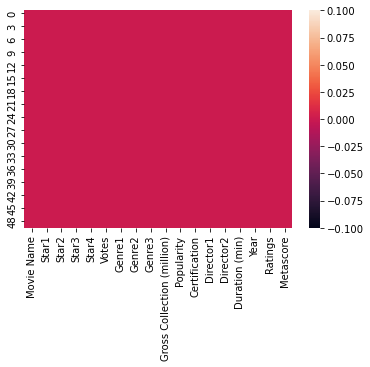

In [51]:
sns.heatmap(df.isnull())

The heatmap displays that there are no null values in the mentioned columns in the dataframe.

In [52]:
df

,Movie Name,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross Collection (million),Popularity,Certification,Director1,Director2,Duration (min),Year,Ratings,Metascore
0,The Dark Knight,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,2759436,Action,Crime,Drama,534.86,1.0,UA,Christopher Nolan,Christian Bale,152,2008,9.0,84.00
1,The Lord of the Rings: The Return of the King,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,1906461,Action,Adventure,Drama,377.85,2.0,U,Peter Jackson,Elijah Wood,201,2003,9.0,94.00
2,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,208788,Animation,Action,Adventure,190.24,3.0,U,Joaquim Dos Santos,Kemp Powers,140,2023,8.8,86.00
3,Inception,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,2449750,Action,Adventure,Sci-Fi,292.58,4.0,UA,Christopher Nolan,Leonardo DiCaprio,148,2010,8.8,74.00
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,1934666,Action,Adventure,Drama,315.54,5.0,U,Peter Jackson,Elijah Wood,178,2001,8.8,92.00
5,The Lord of the Rings: The Two Towers,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,1720335,Action,Adventure,Drama,342.55,6.0,UA,Peter Jackson,Elijah Wood,179,2002,8.8,87.00
6,The Matrix,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,1979033,Action,Sci-Fi,Drama,171.48,7.0,A,Lana Wachowski,Lilly Wachowski,136,1999,8.7,73.00
7,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,Mark Hamill,Harrison Ford,Carrie Fisher,1334801,Action,Adventure,Fantasy,290.48,8.0,UA,Irvin Kershner,Mark Hamill,124,1980,8.7,82.00
8,Soorarai Pottru,Sudha Kongara,Suriya,Paresh Rawal,Urvashi,120282,Action,Drama,Drama,190.24,9.0,U,Sudha Kongara,Suriya,153,2020,8.7,78.95
9,Terminator 2: Judgment Day,James Cameron,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,1135447,Action,Sci-Fi,Drama,204.84,10.0,A,James Cameron,Arnold Schwarzenegger,137,1991,8.6,75.00


In [53]:
df.describe()

,Votes,Gross Collection (million),Popularity,Duration (min),Year,Ratings,Metascore
count,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.959538e+05,224.783400,25.50000,148.280000,2002.680000,8.420000,78.948000
std,7.072741e+05,203.418655,14.57738,34.273831,18.800174,0.225877,9.200593
min,3.166800e+04,0.270000,1.00000,101.000000,1954.000000,8.200000,58.000000
25%,1.261922e+05,73.635000,13.25000,130.250000,1991.500000,8.200000,73.250000
50%,6.609645e+05,190.240000,25.50000,140.500000,2005.000000,8.350000,78.950000
75%,1.189740e+06,292.055000,37.75000,162.750000,2019.000000,8.600000,84.750000
max,2.759436e+06,858.370000,50.00000,321.000000,2023.000000,9.000000,98.000000


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative or invalid values present.

Here are the observations:

1. The counts of all the columns are the same which means there are no missing values in the dataset.
2. The mean value is greater than median(50%) in Votes, Ratings and Gross Collection column which means the data is skewed to the right in these columns.
3. The data in the column Metascore have mean values less than median which means the data is skewed to the left in the respective columns.
4. By summarizing the data, we observe that there is a huge difference between 75% and max hence there are outliers present in the data.
5. We can also notice the standard deviation, min, 25% values using describe method.

In [54]:
# Segregating categorical and numerical column

# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical columns :", categorical_col)
print('\n')

# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print("Numerical columns :", numerical_col)

Categorical columns : ['Movie Name', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2', 'Genre3', 'Certification', 'Director1', 'Director2']


Numerical columns : ['Votes', 'Gross Collection (million)', 'Popularity', 'Duration (min)', 'Year', 'Ratings', 'Metascore']


The columns are split into categorized and numerical columns.

In [55]:
df.nunique().to_frame('No. of unique value')

,No. of unique value
Movie Name,50
Star1,37
Star2,39
Star3,46
Star4,47
Votes,50
Genre1,2
Genre2,8
Genre3,8
Gross Collection (million),37


Checking the unique values again to avoid discrepancy.

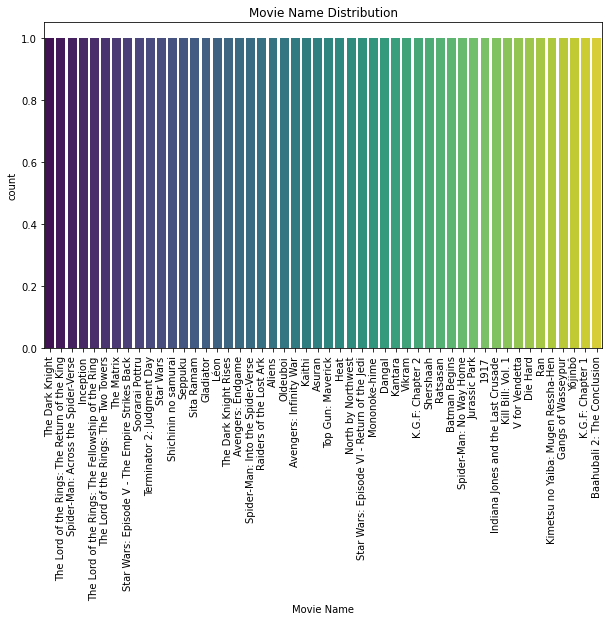

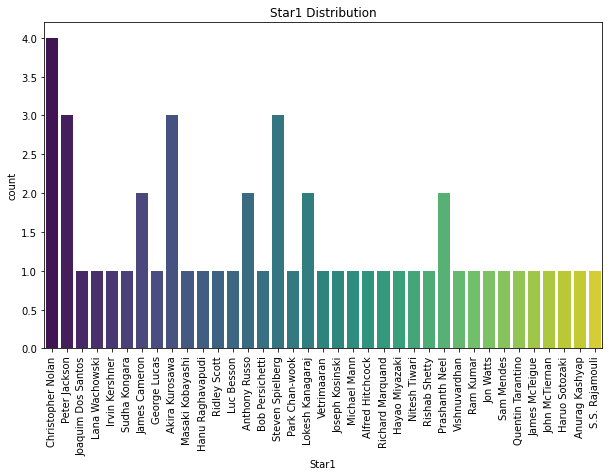

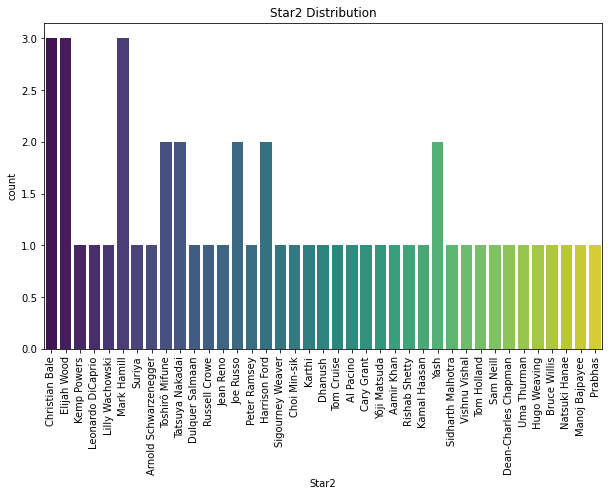

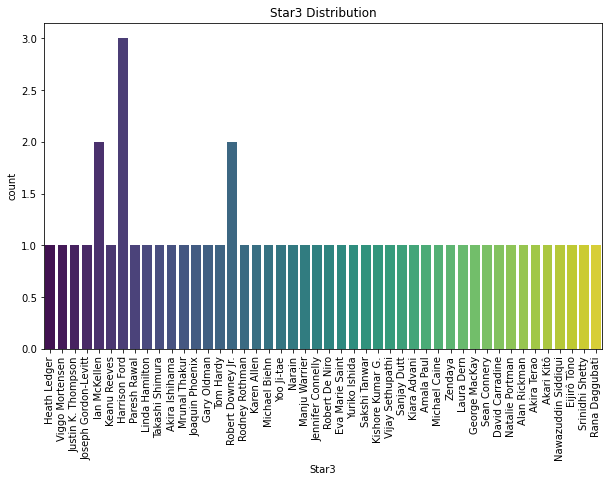

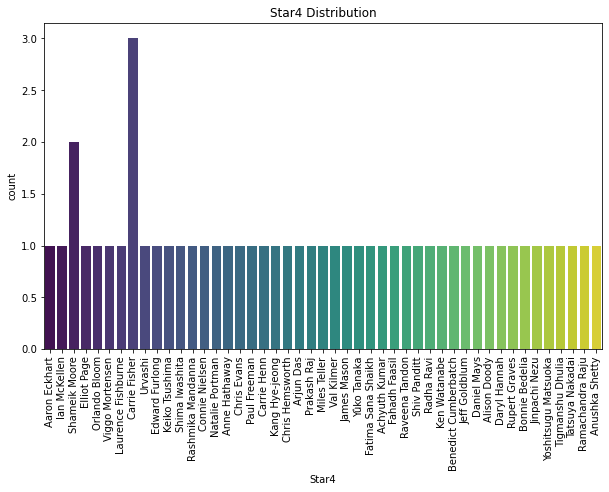

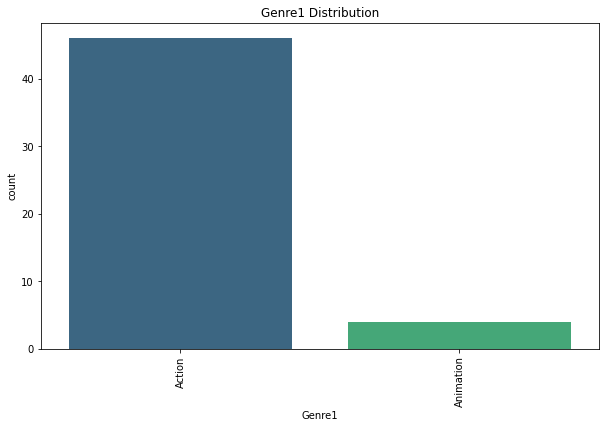

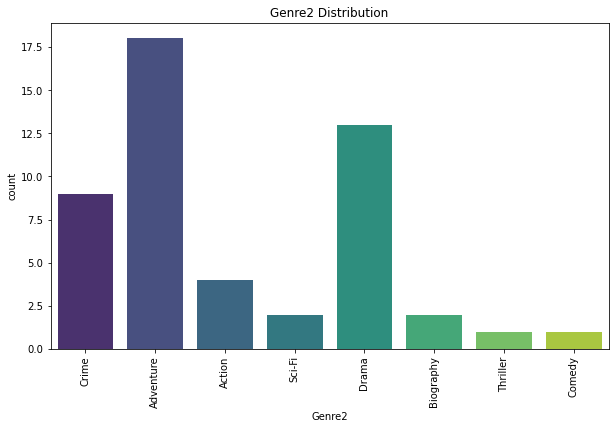

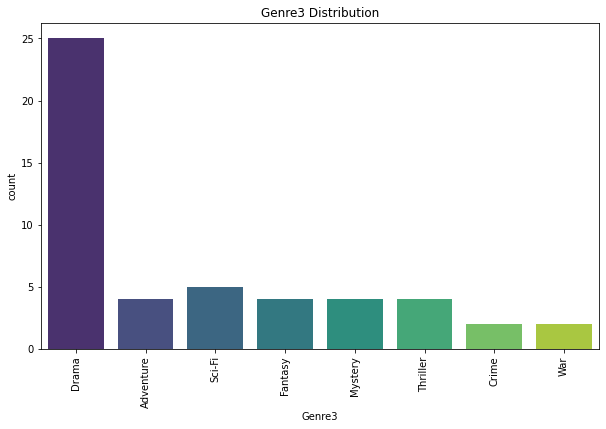

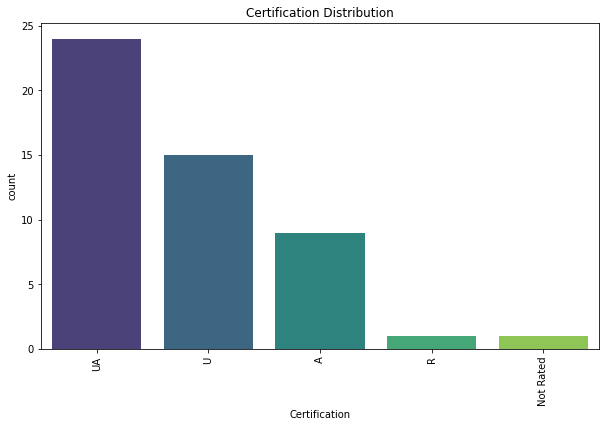

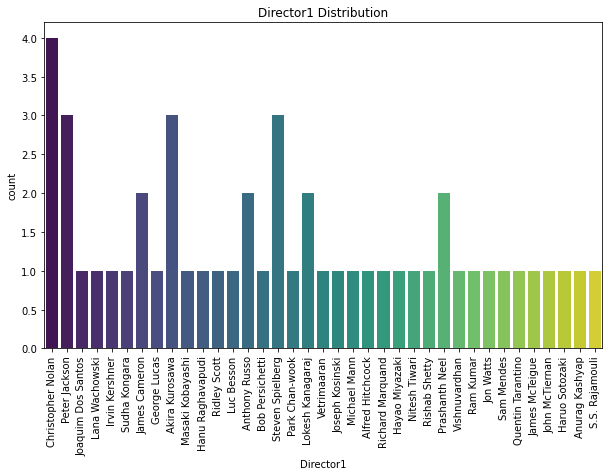

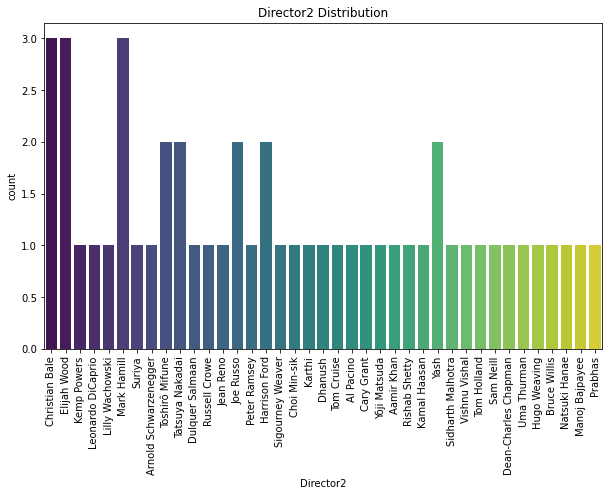

In [58]:
for col in categorical_col:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)
    plt.show()

Exploratory data analysis is made for the categorical columns and analysis is made through graphs and charts where observation can be taken.

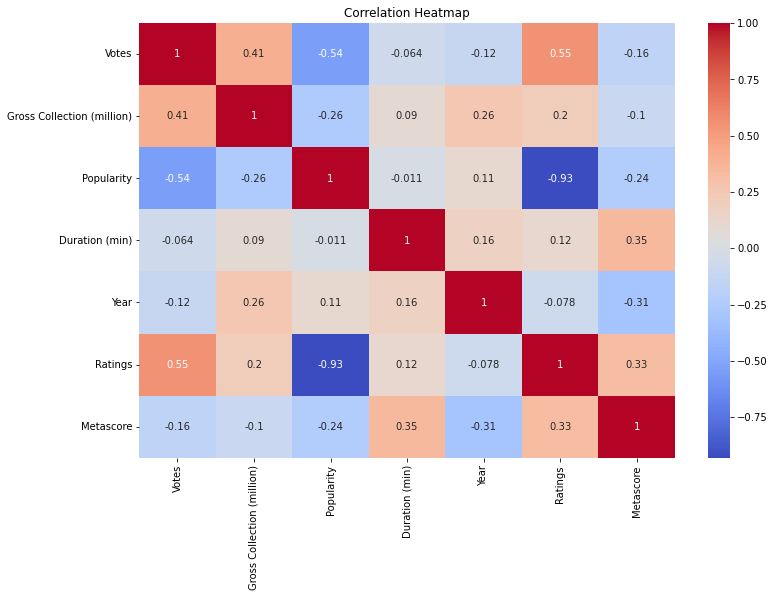

In [59]:
# Correlation Heatmap for Numerical Columns
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the above, the numerical columns are correlated.

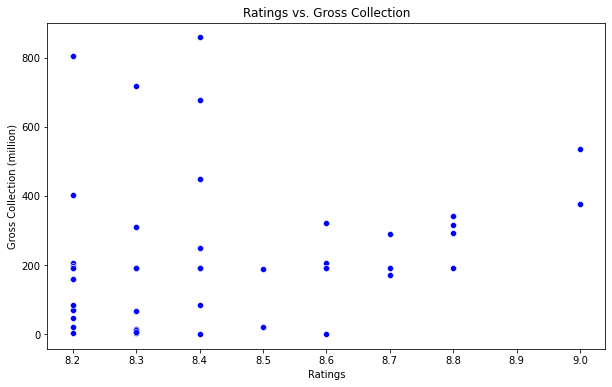

In [60]:
# Scatter Plot of Ratings vs. Gross Collection
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Gross Collection (million)', color='blue')
plt.title('Ratings vs. Gross Collection')
plt.xlabel('Ratings')
plt.ylabel('Gross Collection (million)')
plt.show()

From the above, it is observed that highly rated movies do not reflect with its gross collection.

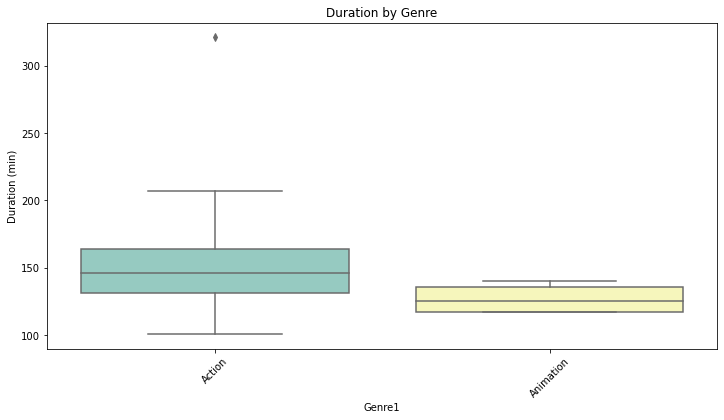

In [61]:
# Box Plot of Duration by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre1', y='Duration (min)', palette='Set3')
plt.title('Duration by Genre')
plt.xticks(rotation=45)
plt.show()

From the above, it is mentioned that most movies have been listed under the genre 'Action' followed by 'Animation'.

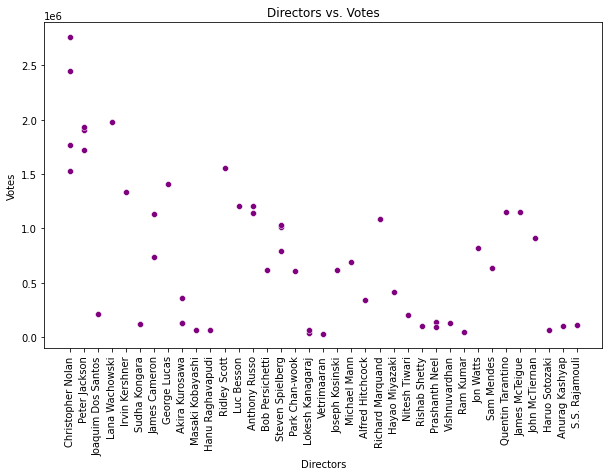

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Director1', y='Votes', color='purple')
plt.title('Directors vs. Votes')
plt.xlabel('Directors')
plt.xticks(rotation=90)
plt.ylabel('Votes')
plt.show()

From the above, it is understood that Christopher Nolan movies have received huge votes comparatively with other directors and the most registered votes have been registered to Hollywood industry.

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Certification', palette='magma')
plt.title('Certification Distribution')
plt.xlabel('Certification')
plt.ylabel('Number of Movies')
plt.show()

Most of the movies in the top 50 IMDB rated is listed under UA rating.

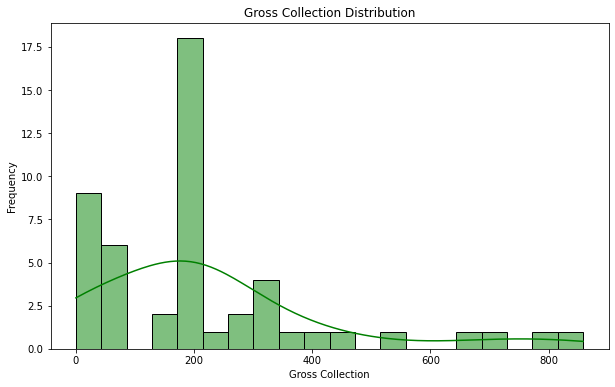

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Gross Collection (million)', bins=20, kde=True, color='green')
plt.title('Gross Collection Distribution')
plt.xlabel('Gross Collection')
plt.ylabel('Frequency')
plt.show()

From the above, it is observed that most of the movies collected a gross collection of close and around 200 million.

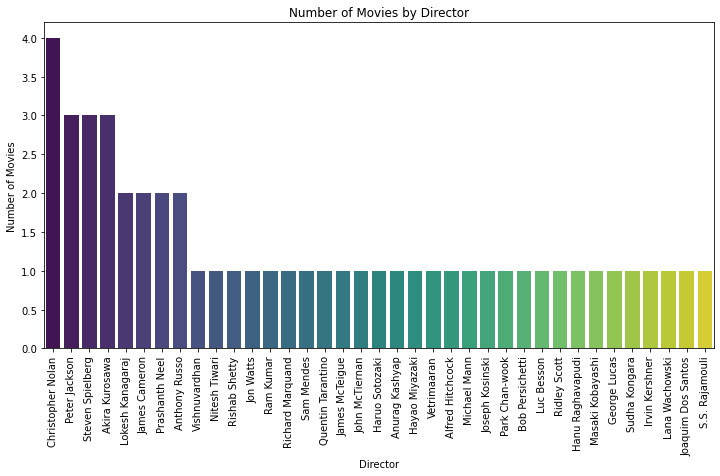

In [65]:
director_movie_count = df['Director1'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=director_movie_count.index, y=director_movie_count.values, palette='viridis')
plt.title('Number of Movies by Director')
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()

In the top 50 IMDB rated movies, Christopher Nolan is the only director to have directed 4 movies.

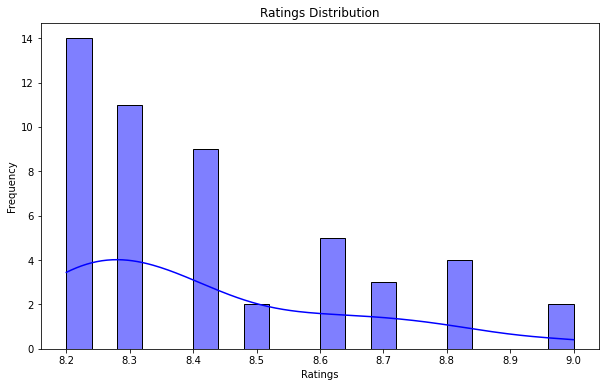

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Ratings', bins=20, kde=True, color='blue')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

It is understood that most of the top 50 imdb rated movies have the rating of 8.2 and no movies have the rating of 8.9 and the least one with 8.5. 

In [67]:
selected_features = ['Ratings', 'Duration (min)', 'Popularity', 'Votes', 'Year']

In [68]:
label_encoders = {}
categorical_cols = ['Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2', 'Genre3', 'Certification', 'Director1', 'Director2']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [69]:
X = df[selected_features]
y_votes = df['Votes']
y_gross = df['Gross Collection (million)']
X_train_votes, X_test_votes, y_train_votes, y_test_votes = train_test_split(X, y_votes, test_size=0.2, random_state=42)
X_train_gross, X_test_gross, y_train_gross, y_test_gross = train_test_split(X, y_gross, test_size=0.2, random_state=42)

In [70]:
scaler = StandardScaler()
X_train_votes_scaled = scaler.fit_transform(X_train_votes)
X_test_votes_scaled = scaler.transform(X_test_votes)
X_train_gross_scaled = scaler.fit_transform(X_train_gross)
X_test_gross_scaled = scaler.transform(X_test_gross)

In [71]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000)
}

In [72]:
trained_models_votes = {}
trained_models_gross = {}

# Train and store models for votes and gross collection
for model_name, model in models.items():
    # For votes prediction
    model.fit(X_train_votes_scaled, y_train_votes)
    trained_models_votes[model_name] = model

    # For gross collection prediction
    model.fit(X_train_gross_scaled, y_train_gross)
    trained_models_gross[model_name] = model


In [77]:
best_model_votes = None
best_mse_votes = float('inf')
print("Model\t\t\tMSE (Votes)")
print("=" * 40)

for model_name, model in trained_models_votes.items():
    y_pred_votes = model.predict(X_test_votes_scaled)
    mse_votes = mean_squared_error(y_test_votes, y_pred_votes)
    print(f"{model_name}\t\t{mse_votes:.2f}")

    if mse_votes < best_mse_votes:
        best_mse_votes = mse_votes
        best_model_votes = model_name

print("=" * 40)
print(f"Best Model for Votes Prediction: {best_model_votes}\n")

# Evaluate Models and Choose the Best for Gross Collection Prediction
best_model_gross = None
best_mse_gross = float('inf')
print("Model\t\t\tMSE (Gross Collection)")
print("=" * 40)

for model_name, model in trained_models_gross.items():
    y_pred_gross = model.predict(X_test_gross_scaled)
    mse_gross = mean_squared_error(y_test_gross, y_pred_gross)
    print(f"{model_name}\t\t{mse_gross:.2f}")

    if mse_gross < best_mse_gross:
        best_mse_gross = mse_gross
        best_model_gross = model_name
print('\n')        
print("=" * 40)
print(f"Best Model for Gross Collection Prediction: {best_model_gross}\n")
print(f"Best Model for Votes: {best_model_votes}")
print("=" * 40)

Model			MSE (Votes)
Linear Regression		378238133414.01
Random Forest		378208510886.30
Gradient Boosting		378170762398.24
SVR		378279536366.03
K-Nearest Neighbors		378210374097.94
Neural Network		378314685787.34
Best Model for Votes Prediction: Gradient Boosting

Model			MSE (Gross Collection)
Linear Regression		57087.89
Random Forest		41911.09
Gradient Boosting		36575.84
SVR		79368.88
K-Nearest Neighbors		62018.07
Neural Network		77067.34


Best Model for Gross Collection Prediction: Gradient Boosting

Best Model for Votes: Gradient Boosting


The mean square error do not much deviation in the above trained models yet Gradient Boosting model reflects minimum error comparatively and hence it is considered as the best model among the trained models.